In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file=(r"C:\Users\DELL\Downloads\advertising.csv")
df=pd.read_csv(file)

In [167]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [168]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [169]:
df.shape

(200, 4)

In [170]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [171]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [172]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [173]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [174]:
correlation_matrix = df.corr()
correlation_matrix

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


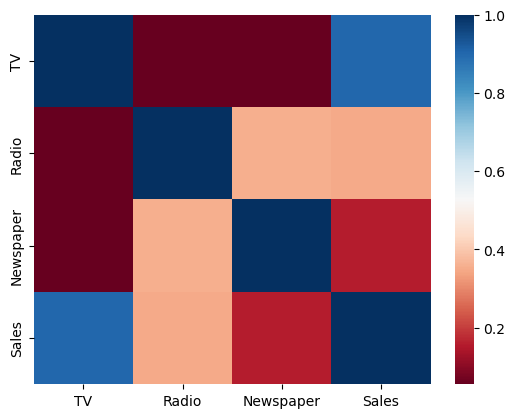

In [175]:
sns.heatmap(correlation_matrix,cmap="RdBu") 
plt.show()

the coorelation is : 0.9012079133023306


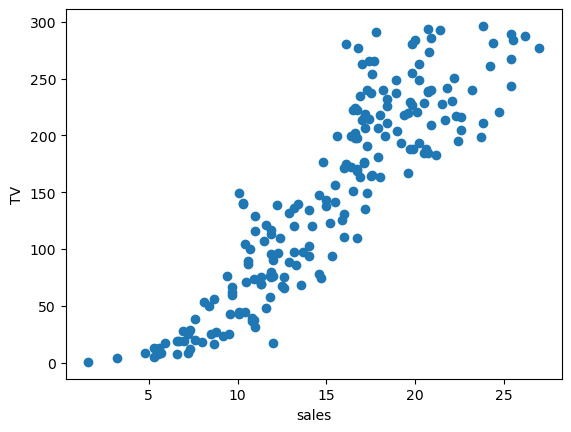

the coorelation is : 0.3496310970076693


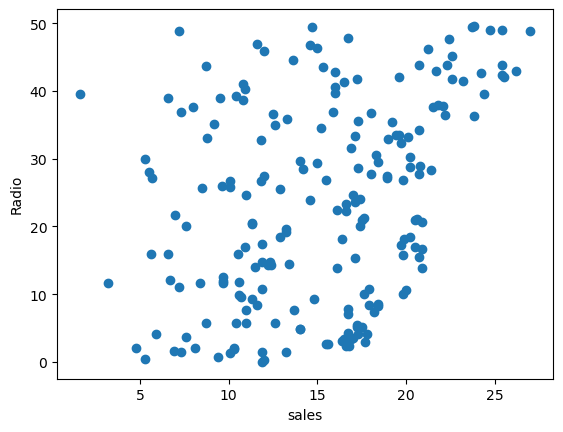

the coorelation is : 0.15796002615492621


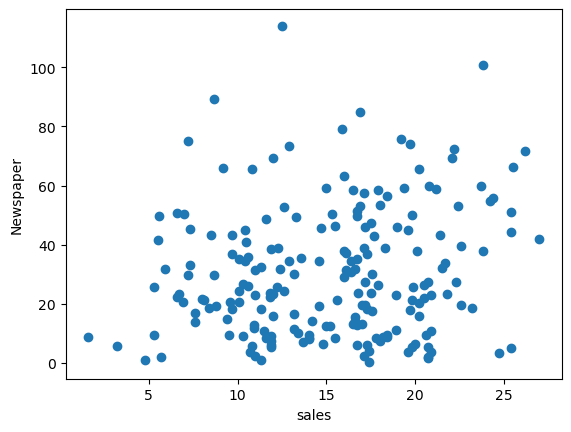

In [176]:
for i in ['TV', 'Radio', 'Newspaper']:
    print("the coorelation is :",df[i].corr(df['Sales']))
    plt.scatter(df['Sales'],df[i])
    plt.ylabel(i)
    plt.xlabel("sales")
    plt.show()

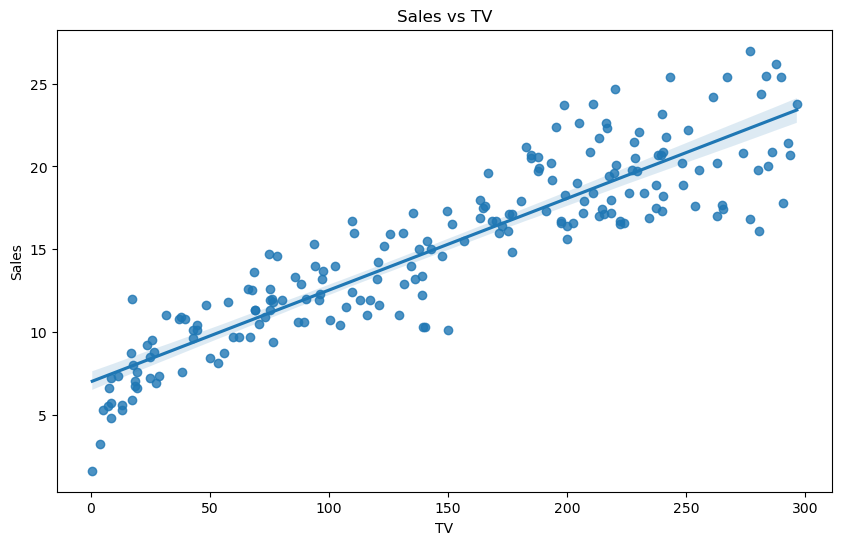

In [177]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['TV'], y=df['Sales'], data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs TV')
plt.show()

In [178]:
for i in ['TV', 'Radio', 'Newspaper','Sales']:
    df[i]=(df[i]-df[i].mean())/df[i].std()

In [179]:
df.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.319009
1,-1.194379,1.080097,0.667903,-0.895268
2,-1.512360,1.524637,1.779084,-0.592461
3,0.051919,1.214806,1.283185,0.259184
4,0.393196,-0.839507,1.278593,0.524140


In [180]:
#Neural Network

In [181]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [182]:
X=df[ ['TV', 'Radio', 'Newspaper']]
Y=df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [183]:
nn_model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

In [184]:
nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)

In [185]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.06781667002891281


In [186]:
r12 = r2_score(y_test, y_pred)
r12

0.9387268189615137

In [187]:
#SVM

In [188]:
from sklearn.svm import SVR

In [189]:
svm_regressor = SVR(kernel='linear')  
svm_regressor.fit(X_train, y_train)

y_pred = svm_regressor.predict(X_test)


In [190]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.10084474482489134


In [191]:
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9088855541889458


In [192]:
#Gradient Boosting

In [193]:
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

In [195]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.06127407712140327


In [196]:
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9446381307306118


In [197]:
#KNN

In [198]:
from sklearn.neighbors import KNeighborsRegressor

In [199]:
knn_regressor = KNeighborsRegressor(n_neighbors=7)

knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

In [200]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.10094978913019818


In [201]:
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9087906453894812


In [202]:
#Polynomial Regression

In [203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [204]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

In [205]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.051667893090902285


In [206]:
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.9533174341074799
